In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten
import cv2
import os

In [76]:
def load_images(image_array,path,nimages_oftype):
    prev_length=len(image_array)
    image_names=[]
    image_names=os.listdir(abs+path)

    for i in image_names:
        img=cv2.imread(abs+path+i)
        
        if(img is not None):
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            image_array.append(img)
    
    nimages_oftype.append(len(image_array))

In [77]:
def resize(images):
    n=len(images)
    for i in range(n):
        images[i] = cv2.resize(images[i],(80,80))

In [78]:
abs="flowers-recognition/flowers/"

path0="daisy/"
path1="dandelion/"
path2="rose/"
path3="sunflower/"
path4="tulip/"

In [79]:
image_array=[]
nimages_oftype=[]

In [80]:
load_images(image_array,path0,nimages_oftype)
load_images(image_array,path1,nimages_oftype)
load_images(image_array,path2,nimages_oftype)
load_images(image_array,path3,nimages_oftype)
load_images(image_array,path4,nimages_oftype)

In [81]:
labels=np.zeros(len(image_array))
labels[nimages_oftype[0]:nimages_oftype[1]]=1
labels[nimages_oftype[1]:nimages_oftype[2]]=2
labels[nimages_oftype[2]:nimages_oftype[3]]=3
labels[nimages_oftype[3]:]=4

In [82]:
resize(image_array)

In [83]:
image_array=np.array(image_array)
labels=np.array(labels)

In [84]:
chosen_idx = np.random.choice(len(image_array), replace=False, size=1000)
new_image_array = image_array[chosen_idx]
new_labels = labels[chosen_idx]

In [85]:
#split into training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(new_image_array, new_labels, test_size=0.1, 
                                                    random_state=200)

In [86]:
#categorically encode the data
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

/home/dhriti/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


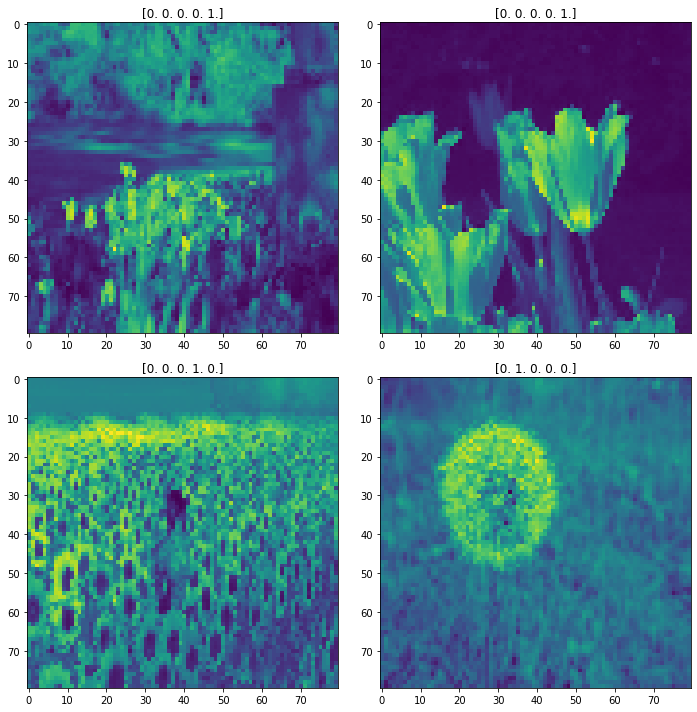

In [88]:
#Visualize data and check corectness of split
vis_index=np.random.choice(1000, replace=False, size=4)
view_image_array = new_image_array[vis_index]
view_labels = new_labels[vis_index]

view_labels=to_categorical(view_labels)

fig,ax=plt.subplots(2,2)
fig.set_size_inches(10,10)
num=0
for i in range(2):
    for j in range (2):
        #l=rn.randint(0,len(Z))
        ax[i,j].imshow(view_image_array[num])
        ax[i,j].set_title(view_labels[num])
        num=num+1
        
plt.tight_layout()

In [89]:
vis_index
(view_labels[0].argmax)

<function ndarray.argmax>

In [90]:
#Build model
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization

In [62]:
model = Sequential()

In [63]:
#1
model.add(Conv2D(filters = 32, kernel_size = (5,5) , input_shape = (80,80,1),
                 padding = 'Same',activation ='relu'))
model.add(Dropout(rate=0.5))
model.add(MaxPooling2D())

In [64]:
#2
model.add(Conv2D(filters = 64, kernel_size = (4,4) ,
                 padding = 'Same',activation ='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D())

In [65]:
#3
model.add(Conv2D(filters = 96, kernel_size = (3,3) ,
                 padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

In [66]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(5, activation = "softmax"))

In [67]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 80, 80, 32)        2432      
_________________________________________________________________
dropout_4 (Dropout)          (None, 80, 80, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 40, 40, 64)        32832     
_________________________________________________________________
batch_normalization_7 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 96)        55392     
__________

In [68]:
history=model.fit(x_train,y_train,batch_size=128,epochs=20, validation_split=.1)
loss,accuracy=model.evaluate(x_test,y_test)

Instructions for updating:
Use tf.cast instead.
Train on 810 samples, validate on 90 samples
Epoch 1/20
810/810 [==============================] - 30s 37ms/step - loss: 2.8903 - acc: 0.6921 - val_loss: 2.8186 - val_acc: 0.6911
Epoch 2/20
810/810 [==============================] - 21s 26ms/step - loss: 2.7320 - acc: 0.7153 - val_loss: 1.5901 - val_acc: 0.7400
Epoch 3/20
810/810 [==============================] - 22s 27ms/step - loss: 2.0448 - acc: 0.7185 - val_loss: 1.4279 - val_acc: 0.7356
Epoch 4/20
810/810 [==============================] - 23s 29ms/step - loss: 1.4477 - acc: 0.7649 - val_loss: 0.9589 - val_acc: 0.7378
Epoch 5/20
810/810 [==============================] - 26s 32ms/step - loss: 1.0773 - acc: 0.7783 - val_loss: 0.9655 - val_acc: 0.7333
Epoch 6/20
810/810 [==============================] - 25s 30ms/step - loss: 0.8163 - acc: 0.8054 - val_loss: 1.1907 - val_acc: 0.7067
Epoch 7/20
810/810 [==============================] - 21s 26ms/step - loss: 0.7041 - acc: 0.8109 - val_

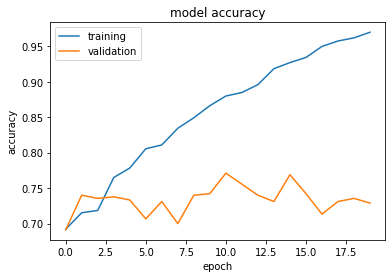

In [71]:
#Plotting
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

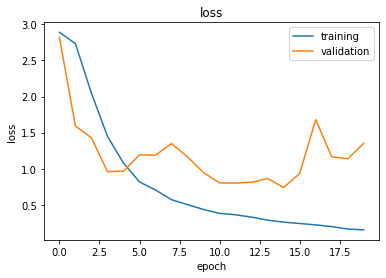

In [72]:
#Plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [73]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 1.27
Test accuracy: 0.752
